![500 Data.png](<attachment:500 Data.png>)
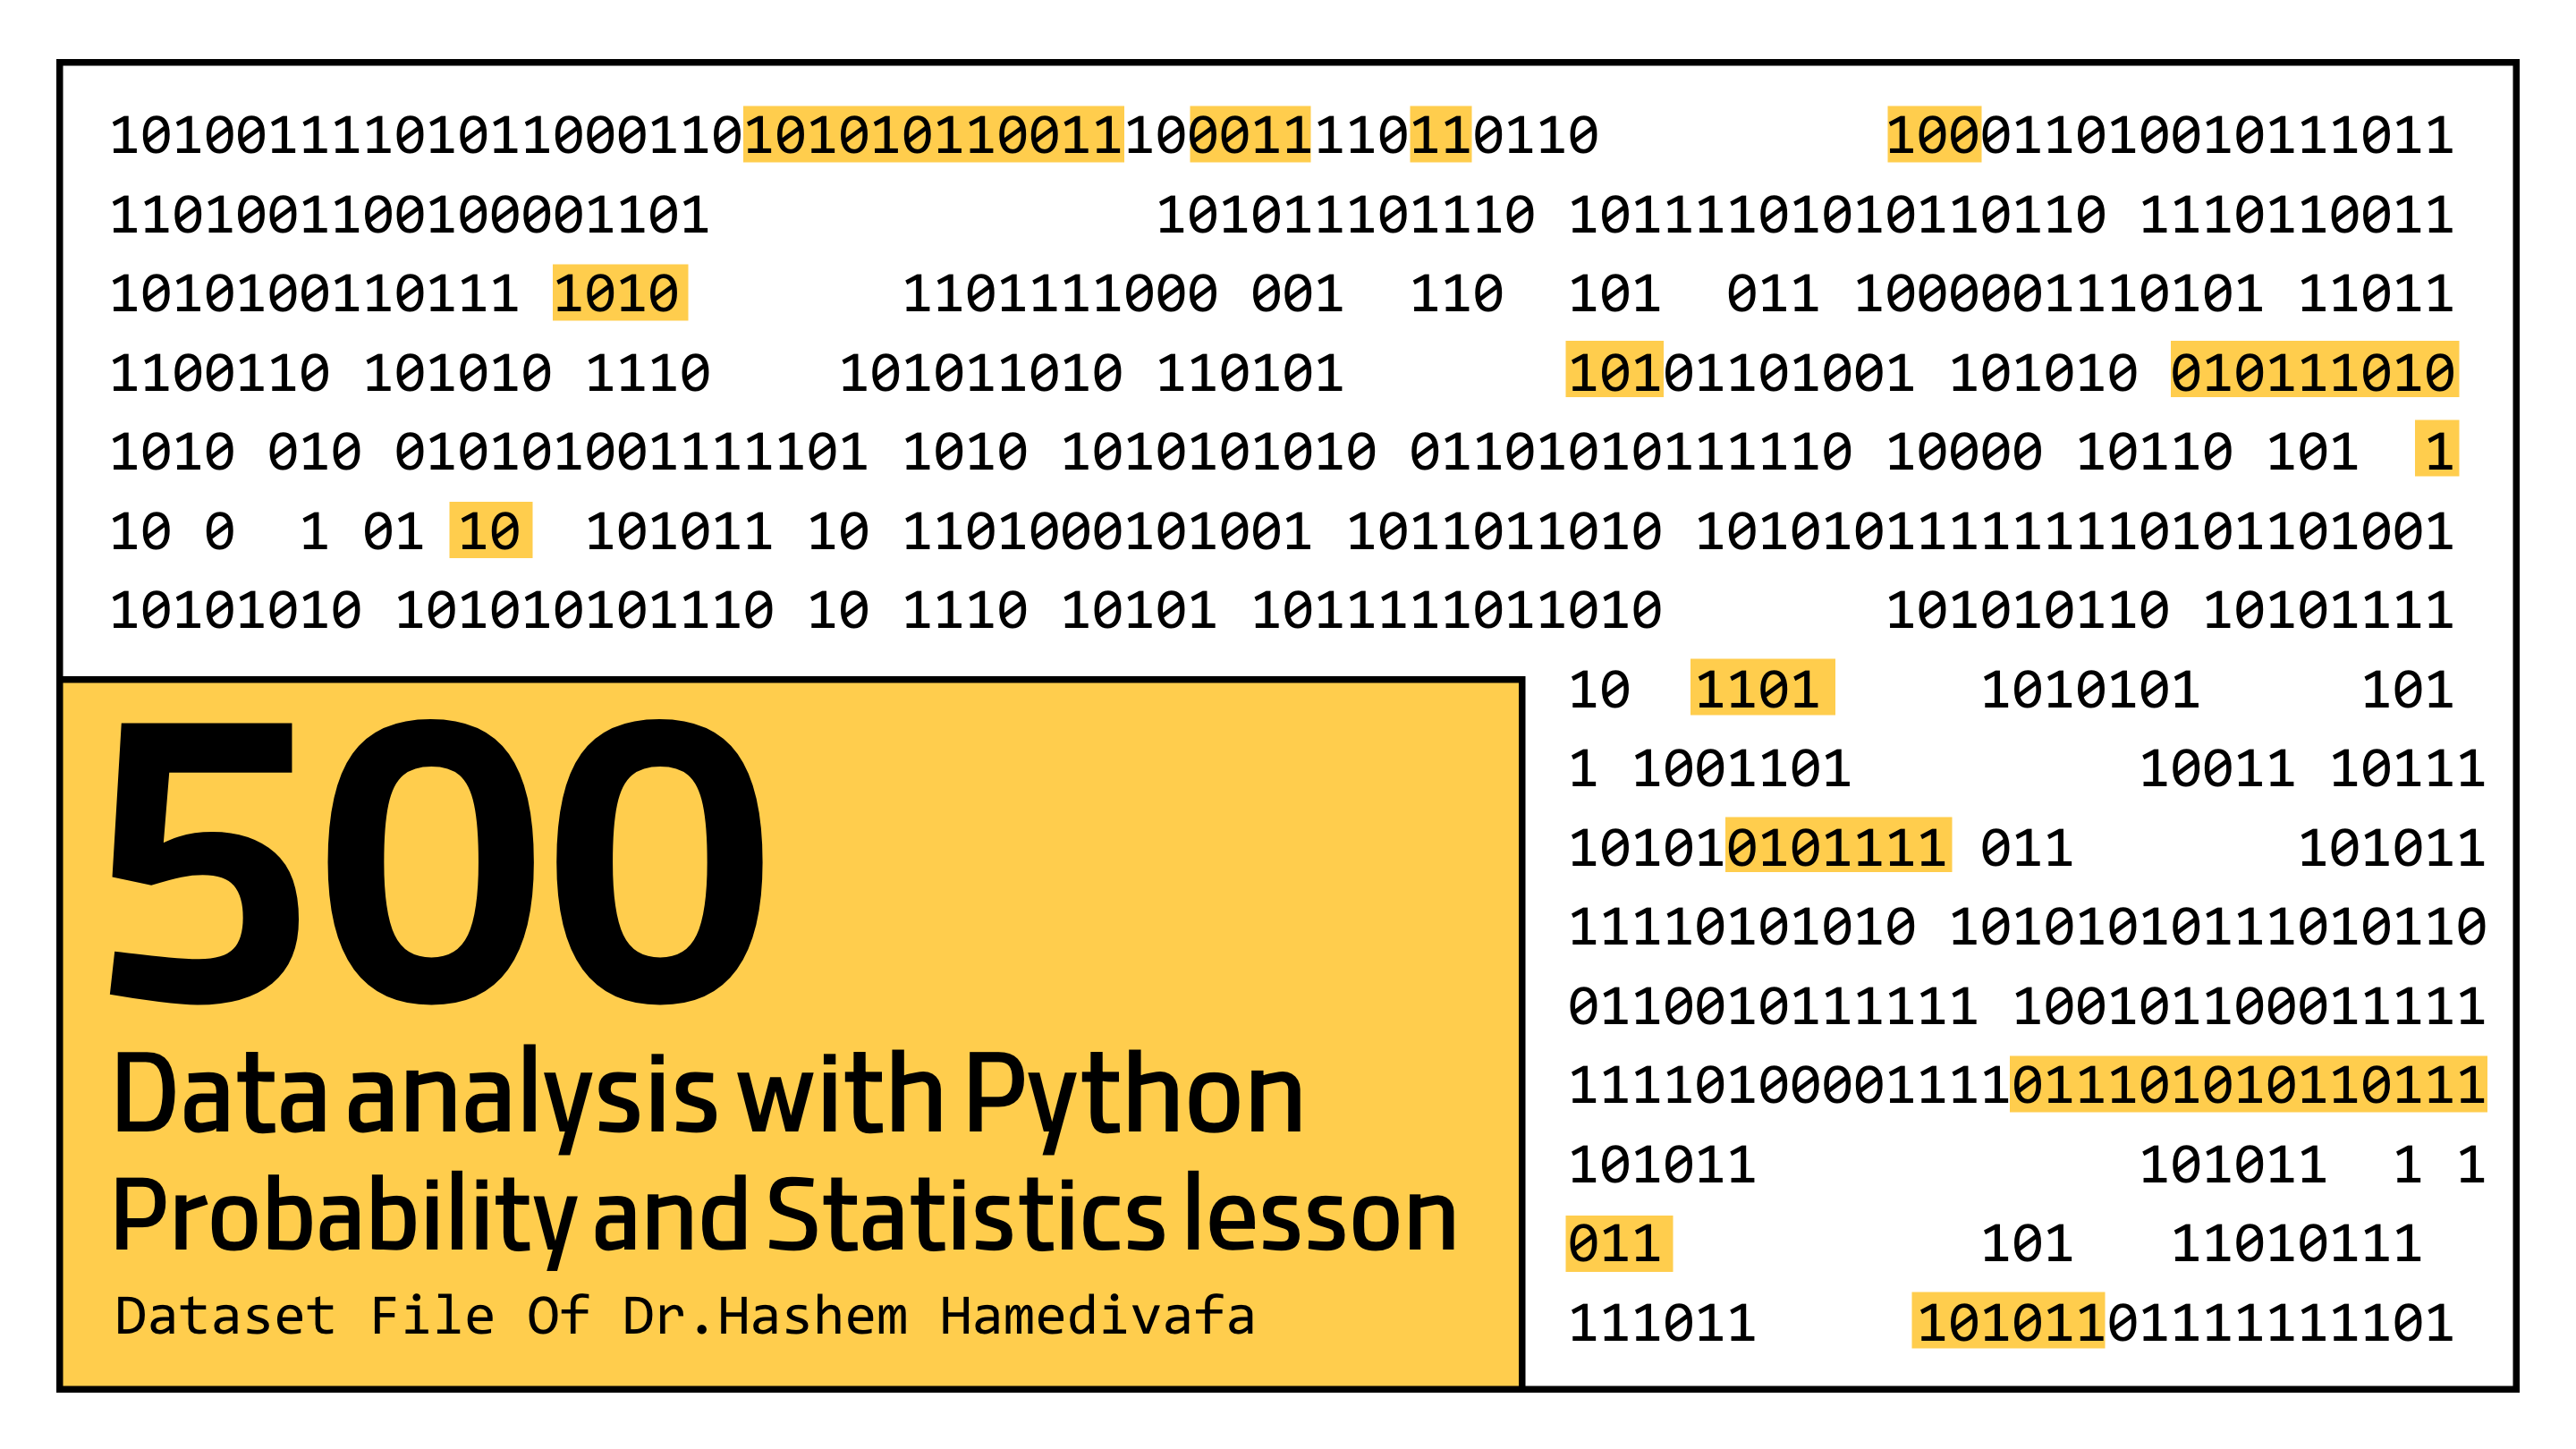

In [38]:
import numpy as np
from scipy import optimize,stats
from scipy.stats import norm,mstats
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas as pd

# new version of numpy arrays show with type in array list
np.set_printoptions(legacy='1.25')

In [39]:
data_str = '''
-1.2   -0.7   0.8    0.9   -0.4   -1.6   -0.7    0.6   1.6   -0.1   0.1   -1.7   -0.4   -2.1    0.9    2.0   -1.0   -0.5   -0.2  -1.8 -0.9   -0.4   -1.6   -0.2   -0.5    0.1   -0.6   -0.3   -0.9   1.6   
0.7   -0.8   -0.6   -0.9   -1.2    0.4    0.1    0.0    1.3   1.0 0.4   1.4   2.3    0.9    0.8   -1.1   -0.6    0.0   -1.3   0.5   -0.1   1.4   1.1   -0.5    0.5   -0.6    0.2    1.7   -1.7 1.3 
-0.2   0.3   -1.3   -0.4    0.4    0.3   -0.5   -0.5   -0.1   0.4   0.2   0.9   0.0   -0.9   -1.5    0.7    1.1   -0.3    0.3   1.8  0.8   0.9   -1.2   -1.0   -2.5   -0.5    1.1   -1.1    0.0  -1.5   
1.6   -0.7   0.2   -0.3   -0.8   -1.4    0.9   -0.3   -0.7   1.3 -0.7    0.6   -0.2    0.9   -0.6    1.2    0.2    2.2   -1.1   -1.0   -2.3    0.5   -0.6   -0.1   -1.3   -1.9   -1.9    0.1   -0.4   -0.2 
-0.7   -0.9   -0.3   -0.6    2.2   -0.8   -1.5    0.4    0.3   -0.3   1.7   -1.4    1.6   -0.6   -1.3   -0.1   -0.5    1.0   -0.7   -1.0  0.5   -1.3   -0.3    0.3    1.1    1.1    0.6    1.7    0.5   -2.3   
1.8    0.4   -0.5   -1.8    1.3    0.5   -0.9   -0.0    1.0   -1.7 1.9    0.5   -1.3   -0.1    0.0    0.8   -0.2    0.6   -0.3   0.6   1.3   -1.2   -0.9    0.4   -1.3    1.5    1.1   -1.5   -1.8   0.3  -0.2  
-0.0   -1.2   -0.1   -1.2   -1.1    0.1   -0.8   -2.1   -1.4   1.1   -0.9   -0.6   -0.2   -0.6    0.4    2.2   -1.5   -0.5   1.5 0.6   -1.5   -0.5   -0.7    1.3    0.3   -0.5    1.9   -0.0   1.5   0.6   -0.7  
-2.3   -0.1    3.0    0.3    1.5   -1.7    0.2   -0.7 -0.9  0.7    1.7    0.4   -0.0   -0.8    0.2   -0.1    0.3   2.1   -0.3   -0.8    0.5   -0.5    1.9    0.1    1.0   -0.4   -1.2   0.2 
1.2   -0.0    0.5    2.4   -0.5   -0.7   -0.1    0.2   -0.3   .03   -0.2   -0.2   -0.3    1.4   -1.1   -2.3    0.3   -0.4   -0.5   0.4 -0.1    0.1   -0.7   -1.5   -0.1   -0.4   -0.5    0.3    0.1   1.0    
-0.1   -0.4    1.8   -0.1   -0.3   -0.5   -0.1    0.5   -0.4   0.4 -1.4   -0.5   -0.9   -0.3   -0.5   -0.4   -1.3   -0.1   -0.3   0.9   1.5   -0.8    1.0   -2.0    1.7    0.3   -0.9    0.7   -1.4    0.7 -0.3 
-1.1    0.2   -0.0    1.2    0.8   -0.6   -0.5    0.7   0.5   -1.5    0.3    0.8   -1.3    0.6    1.1    2.4    0.1   -0.0   1.6  -1.3    0.9    0.1    0.9    0.2    0.1   -0.8    0.6   -0.9   0.2   
-0.3   -0.5    1.4   -0.3    0.9    1.0    0.2   -1.2    0.3   -1.1 -1.6   -0.1    1.3   -0.0    0.3    1.4   -1.5   -1.1   -0.9   -0.2    0.1    0.0   -0.9    1.1   -0.9   -0.4   -1.1    0.3    0.7   0.2  -0.5
0.2    0.3    0.9    0.3   -0.6   -0.1   -1.9    0.2   -1.4    0.7    0.6   -1.2   -0.6   -0.5   0.2   -1.9   -0.3    0.7    1.7  -1.4    0.5   -0.0   -0.7    0.1   0.4    0.1   -0.2   -1.0   -1.9   
-0.8   -0.1   -0.5    1.0   -0.1   -0.8    1.4   -0.1    1.9   0.0  -0.7   -0.2   -0.2    0.6   -2.0   -0.6   -0.5   -0.7    3.0   -0.9    -0.8    0.6   -0.7    0.9    0.2   0.3    0.9    1.4    0.1   -1.9 
-1.4    0.3   -0.1   -0.6   -2.2   0.6   -1.1    0.4    0.6   -1.5    -0.3   -0.6    0.4    0.2    0.9    0.6   -0.8   -1.1    1.2    0.1  -0.7    0.7    0.4    0.9    1.2   -1.3   -0.1    0.6    2.0    0.7   
-1.5   -1.2   -0.1   -0.6    0.1    1.1   -0.4   -0.1   -1.5   -1.7  -0.9   -0.2   -2.3   -1.0    1.1   -0.7    1.1    0.5   -0.0   -0.5    -0.7   -0.4   -1.8   -0.4    0.4    0.2   -0.3    0.9    0.6    0.8 
0.2    0.3    0.8    1.7    0.2   -0.9    0.1    0.1    0.2    0.3    0.4    0.4    0.1    0.9   -0.6   -0.5   -2.5   -1.1   -1.5   -0.4 
'''
im_data = np.array(data_str.split()).astype('float')

In [40]:
# Method 1
new_data, abundance = np.unique(im_data, return_counts=True)
# Method 2
'''new_data = pd.Series(im_data)
abundance = new_data.value_counts().sort_index()'''

'new_data = pd.Series(im_data)\nabundance = new_data.value_counts().sort_index()'

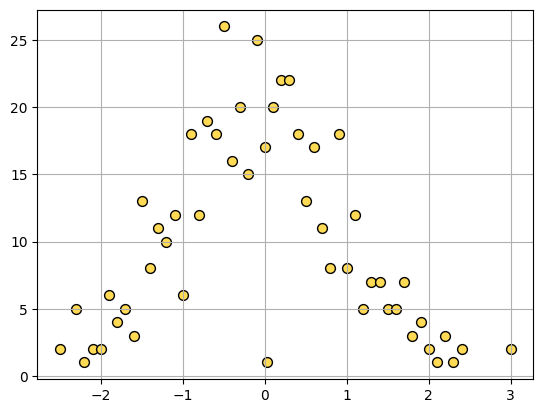

In [41]:
filled_style = dict(marker='o',s=50,color = '#ffda54',edgecolors ='black')
plt.scatter(new_data,abundance,**filled_style)
plt.grid()

for Practice :)

In [42]:
'''data = list(np.sort(np.array(im_data)))

def remove(main):
    end, check , x = [], [] , 0
    for i in range(len(main)):
        if main[i] not in end: end.append(main[i])

    for i in end:
        for j in main:
            if j == i: x+=1
        check.append(x) ; x=0
    return end,check

new_data, abundance = remove(data)

print(f'dataset: {new_data} ,\nlen: {len(new_data)}')
print(f'abundance: {abundance} ,\nlen: {len(abundance)}')'''

"data = list(np.sort(np.array(im_data)))\n\ndef remove(main):\n    end, check , x = [], [] , 0\n    for i in range(len(main)):\n        if main[i] not in end: end.append(main[i])\n\n    for i in end:\n        for j in main:\n            if j == i: x+=1\n        check.append(x) ; x=0\n    return end,check\n\nnew_data, abundance = remove(data)\n\nprint(f'dataset: {new_data} ,\nlen: {len(new_data)}')\nprint(f'abundance: {abundance} ,\nlen: {len(abundance)}')"

## Part 1

<p align=right style="font-family: 'Estedad'"> انتخاب یک طول رده مناسب و رده های متصل (تعداد رده به انتخاب خودتان) </p>


In [43]:
total_bins = np.histogram(new_data, bins='auto')
counts = total_bins[0]
bins = total_bins[1]

intervals = [f"[{bins[i]:.2f}, {bins[i+1]:.2f}]" for i in range(len(counts))]

#Method 1
Delta_x = bins[1] - bins[0]
#Method 2
#L = (bins[-1] - bins[0]) / len(counts)

print('intervals: ', intervals)
print('counts: ',[int(i) for i in counts])
print('bins: ',[i for i in bins])
print(f'bins distance: {Delta_x:.2f}')
#print(f'L: {L:.2f}')

intervals:  ['[-2.50, -1.71]', '[-1.71, -0.93]', '[-0.93, -0.14]', '[-0.14, 0.64]', '[0.64, 1.43]', '[1.43, 2.21]', '[2.21, 3.00]']
counts:  [7, 8, 8, 9, 8, 8, 3]
bins:  [-2.5, -1.7142857142857144, -0.9285714285714286, -0.1428571428571428, 0.6428571428571428, 1.4285714285714284, 2.2142857142857144, 3.0]
bins distance: 0.79


<p align=right style="font-family: 'Estedad'"> جدول فراوانی شامل بازه رده، مرکز رده، چگالی فراوانی، فراوانی تجمعی و فراوانی نسبی </p>

<p align=right style="font-family: 'Estedad'">مرکز رده</p>

$$ x_i = \frac{U_i - L_i}{2} $$

In [44]:
bin_centers = (bins[:-1] + bins[1:]) / 2
bin_centers

array([-2.10714286, -1.32142857, -0.53571429,  0.25      ,  1.03571429,
        1.82142857,  2.60714286])

$$ \sum_{i=1}^{N} F_i = N $$

<p align=right style="font-family: 'Estedad'">چگالی فراوانی</p>

$$ d_i = \frac{F_i}{\Delta x_i} $$

In [45]:
bin_density = counts / Delta_x
bin_density

array([ 8.90909091, 10.18181818, 10.18181818, 11.45454545, 10.18181818,
       10.18181818,  3.81818182])

<p align=right style="font-family: 'Estedad'"> (Cumulative Frequency)(فراوانی نسبی) فراوانی تجمعی </p>

$$ f_i = \frac{F_i}{N} $$
$$ (0 < f_i < 1) \ ; \ \sum_{i=1}^{N} f_i = 1 $$

In [46]:
f = np.cumsum(counts) / np.sum(counts)
print('Cumulative Frequency:', f)

Cumulative Frequency: [0.1372549  0.29411765 0.45098039 0.62745098 0.78431373 0.94117647
 1.        ]


<p align=right style="font-family: 'Estedad'"> (Relative Cumulative Frequency) فراوانی تجمعی نسبی </p>

$$ P_i = f_i \times 100 $$
$$ \sum_{i}^{N} P_i = 100 $$

In [47]:
P = (np.cumsum(counts)/np.sum(counts)) * 100
print('Relative Cumulative Frequency:',P)

Relative Cumulative Frequency: [ 13.7254902   29.41176471  45.09803922  62.74509804  78.43137255
  94.11764706 100.        ]


In [48]:
RCF_Table = pd.DataFrame({
    'intervals': intervals, 
    'Counts': counts,
    'Cumulative Frequency': np.cumsum(counts) / np.sum(counts),
    'Relative Cumulative Frequency':(np.cumsum(counts) / np.sum(counts))* 100 
})

Frequency_Table = pd.DataFrame({
    'Bin_Centers': bin_centers,
    'Counts': counts,
    'Density': bin_density
})

RCF_Table.head() , Frequency_Table.head()

(        intervals  Counts  Cumulative Frequency  Relative Cumulative Frequency
 0  [-2.50, -1.71]       7              0.137255                      13.725490
 1  [-1.71, -0.93]       8              0.294118                      29.411765
 2  [-0.93, -0.14]       8              0.450980                      45.098039
 3   [-0.14, 0.64]       9              0.627451                      62.745098
 4    [0.64, 1.43]       8              0.784314                      78.431373,
    Bin_Centers  Counts    Density
 0    -2.107143       7   8.909091
 1    -1.321429       8  10.181818
 2    -0.535714       8  10.181818
 3     0.250000       9  11.454545
 4     1.035714       8  10.181818)

<p align=right style="font-family: 'Estedad'">با استفاده از جدول فراوانی، میانگین و انحراف معیار توزیع(داده های گروه بندی شده) محاسبه کنید</p>

<p align=right style="font-family: 'Estedad'"> میانگین داده های گروه بندی شده </p>

$$ \mu_g = \frac{\sum_{i=1}^{k} x_i f_i}{\sum_{i=1}^{k} f_i} $$

In [49]:
grouped_mean = np.sum(Frequency_Table['Bin_Centers'] * Frequency_Table['Counts']) / np.sum(Frequency_Table['Counts'])

<p align=right style="font-family: 'Estedad'"> انحراف معیار داده های گروه بندی شده </p>

$$ \sigma_g = \sqrt{\frac{\sum_{i=1}^{k} f_i (x_i - \mu_g)^2}{\sum_{i=1}^{k} f_i}} 
= \sqrt{\frac{\sum_{i=1}^{k} f_i (x_i - \mu_g)^2}{N}} $$

In [50]:
grouped_std = np.sqrt(np.sum(Frequency_Table['Counts'] * (Frequency_Table['Bin_Centers'] - grouped_mean)**2) / np.sum(Frequency_Table['Counts']))

In [51]:
print(f'std: {grouped_std:.2f}, mean: {grouped_mean:.2f}')

std: 1.42, mean: 0.07


<p align=right style="font-family: 'Estedad'"> بافت نگار فراوانی و نمودار فراوانی تجمعی نسبی را رسم کنید </p>

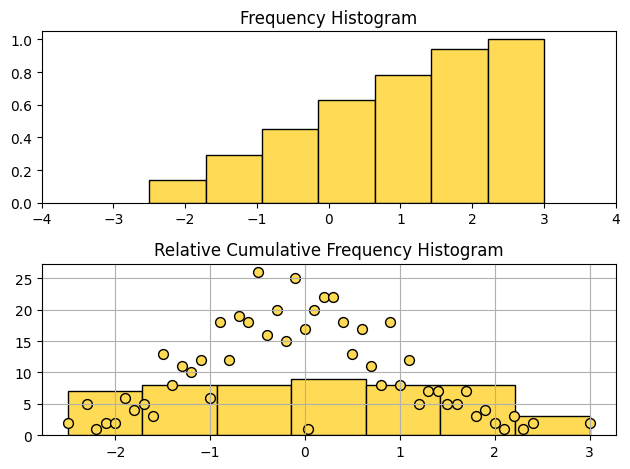

In [52]:
fig, ax = plt.subplots(2, 1, dpi=100)

ax[0].set_title('Frequency Histogram')
ax[0].hist(new_data, bins='auto',cumulative=True, density=True,linewidth=1,color='#ffda54',edgecolor='black')
ax[1].set_title('Relative Cumulative Frequency Histogram')
ax[1].hist(new_data, bins='auto',linewidth=1,color='#ffda54',edgecolor='black')
ax[1].scatter(new_data, abundance, label='Data',**filled_style)
ax[0].set_xlim(-4,4)
ax[1].grid()

plt.tight_layout()

Relative cumulative frequency plot

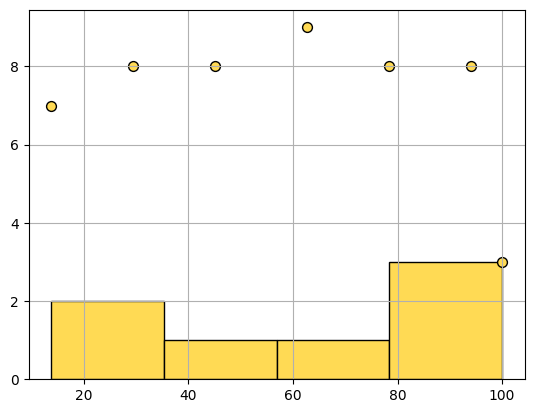

In [53]:
plt.hist(P ,bins='auto', linewidth=1 ,color='#ffda54', edgecolor='black')
plt.scatter(P ,counts ,**filled_style)
plt.grid()

<p align=right style="font-family: 'Estedad'">چارک اول،دوم و سوم توزیع را بدست آورید. بازه میان چارکی چقدر است؟</p>

<p align=right style="font-family: 'Estedad'">چندک ها</p>

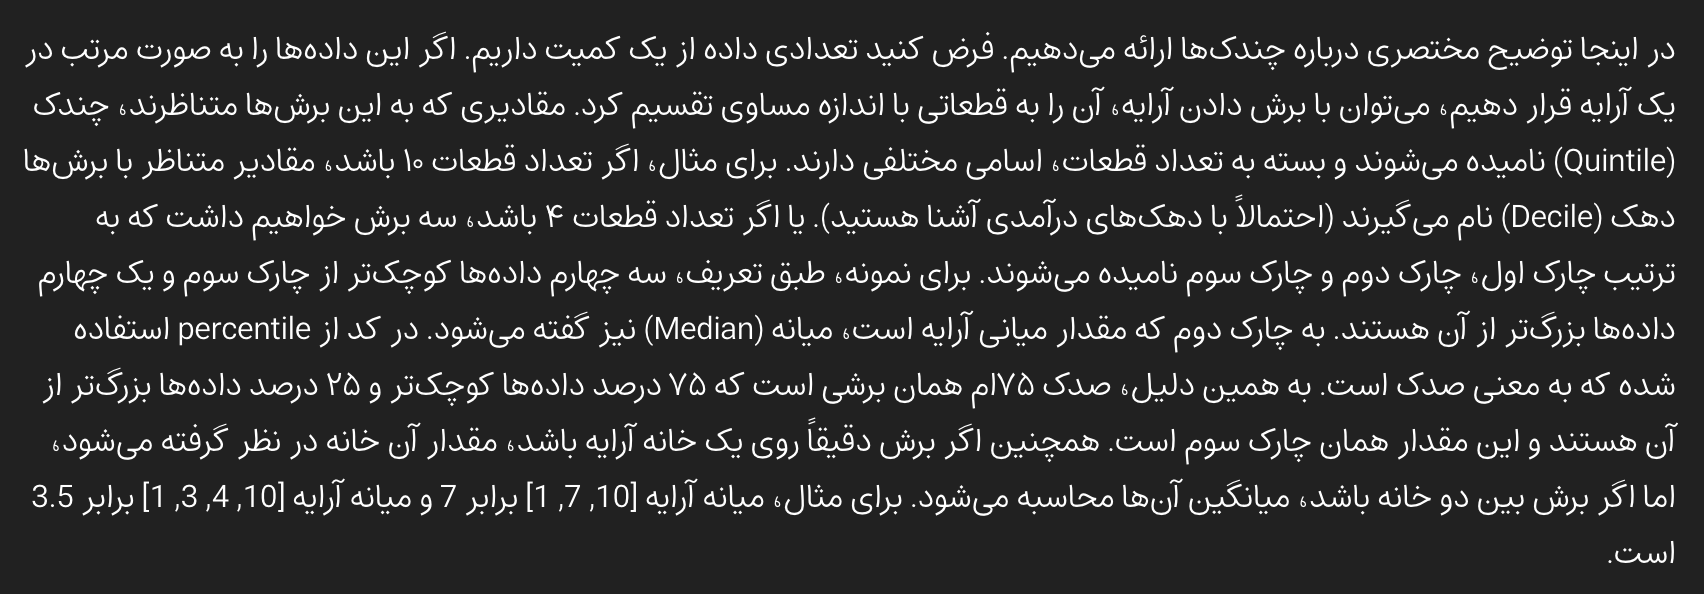

<p align=right style="font-family: 'Estedad'">بازه میان چارکی (انحراف چارک) یا (نیم دامنه چارکی)</p>

$$ IQR = Q3-Q1 $$

<p align=right style="font-family: 'Estedad'">از انحراف چارکی زمانی استفاده میشود که مقیاس اندازه گیری حداقل فاصله ای باشد</p>
<p align=right style="font-family: 'Estedad'">اگر انحراف چارکی اندازه ها برابر صفر باشد، 50% اندازه هایی که در وسط قرار گرفته اند،‌با هم برابرند. در نتیجه چارک اول و دوم و سوم با هم برابرند و برعکس</p>

$$ SIQR = 0 \Longleftrightarrow Q1=Q2=Q3 $$

<p align=right style="font-family: 'Estedad'">:مورد استفاده چارک ها در تعیین مقدار چولگی در توزیع های فراوانی می باشد</p>

<p align=center style="font-family: 'Estedad'"> آنگاه چولگی صفر است </p>

$$ \text{if} \ (Q_3 - Q_2) = (Q_2 - Q_1) $$

<p align=center style="font-family: 'Estedad'"> آنگاه چولگی مثبت است </p>

$$ \text{if} \ (Q_3 - Q_2) > (Q_2 - Q_1) $$

<p align=center style="font-family: 'Estedad'"> آنگاه چولگی منفی است </p>

$$ \text{if} \ (Q_3 - Q_2) < (Q_2 - Q_1) $$

In [54]:
# Method 1
Q1 = np.percentile(new_data, 25)
Q2 = np.percentile(new_data, 50)
Q3 = np.percentile(new_data, 75)

print('25th percentile:', Q1)
print('50th percentile(Median):', Q2)
print('75th percentile:', Q3)
# Method 2
# use .describe()

print('IQR:', Q3-Q1)

25th percentile: -1.15
50th percentile(Median): 0.03
75th percentile: 1.25
IQR: 2.4


<p align=right style="font-family: 'Estedad'"> با استفاده از جدول فراوانی، میانگین نمونه پیراسته و نمونه وینزوری را محاسبه کنید</p>

<p align=right style="font-family: 'Estedad'"> (Trimmed Mean)میانگین پیراسته </p>

<p align=right style="font-family: 'Estedad'"> میانگین پیراسته یک میانگین است که در آن درصدی از مقادیر بزرگ و کوچک حذف می‌شود تا تأثیر داده‌های پرت کاهش یابد </p>

In [55]:
trimmed_mean = stats.trim_mean(new_data, 0.1)
print(f'trimmed mean: {trimmed_mean:.3f}')

trimmed mean: 0.050


<p align=right style="font-family: 'Estedad'"> (Winsorized Mean)میانگین وینزوری </p>

<p align=right style="font-family: 'Estedad'"> میانگین وینزوری مشابه میانگین پیراسته است، اما به‌جای حذف مقادیر پرت، آن‌ها را به نزدیک‌ترین مقدار در محدوده داده‌های باقی‌مانده تبدیل می‌کند </p>

In [56]:
winsorized_mean = mstats.winsorize(new_data, limits=[0.1, 0.1]).mean()
print(f'winsorized mean: {winsorized_mean:.3f}')

winsorized mean: 0.050


<p align=right style="font-family: 'Estedad'"> یک تابع گاوسی بر بافت نگار فراوانی توزیع برازش دهید </p>

In [57]:
b, c = 0,1 # mean , var
a = 1 / c * np.sqrt(2 * np.pi)

def gauss(x,a,b,c):
    return a * np.exp(-(pow((x - b),2)) / (2 * pow(c,2)))

popt, pcov = curve_fit(gauss, new_data, abundance, p0 = [max(abundance), b, c])

Frequency Histogram

<p dir="rtl" align="justify" style="font-family: Estedad"> 
در تابع curve_fit از کتابخانه SciPy که برای برازش منحنی به داده‌ها استفاده می‌شود، دو خروجی اصلی به نام‌های popt و pcov وجود دارند:
</p>

<p dir="rtl" align="justify" style="font-family: Estedad">
1.popt (Optimal Parameters):
</p>
<p dir="rtl" align="justify" style="font-family: Estedad">
این خروجی یک آرایه است که حاوی مقادیر بهینه پارامترهای تابع برازش‌شده می‌باشد. به بیان ساده، این پارامترها مقادیری هستند که تابع شما را بهترین برازش ممکن با داده‌های مشاهده‌شده ایجاد می‌کنند.</p>

<p dir="rtl" align="justify" style="font-family: Estedad">
2.pcov (Covariance of Parameters):
</p>
<p dir="rtl" align="justify" style="font-family: Estedad">
این خروجی یک ماتریس کوواریانس است که عدم قطعیت مقادیر پارامترهای برازش‌شده را نشان می‌دهد. مقادیر موجود در قطر اصلی این ماتریس (یعنی pcov[i, i]) واریانس پارامترهای متناظر در popt هستند، و با گرفتن جذر این مقادیر، می‌توانید خطای استاندارد پارامترهای برازش‌شده را محاسبه کنید.
</p>
<p dir="rtl" align="justify" style="font-family: Estedad">
بنابراین، popt به شما مقادیر پارامترهایی که بهترین برازش را به داده‌های شما می‌دهند ارائه می‌دهد، و pcov اطلاعاتی در مورد میزان اطمینان به این پارامترها فراهم می‌کند.
</p>

In [58]:
popt

array([18.63121109, -0.12024069,  1.04454909])

In [59]:
pcov

array([[ 1.21209478e+00, -4.49309620e-04, -4.74729068e-02],
       [-4.49309620e-04,  5.44951515e-03, -4.82055709e-05],
       [-4.74729068e-02, -4.82055709e-05,  5.66659302e-03]])

In [60]:
a_opt, b_opt, c_opt = popt
x_model = np.linspace(min(new_data) - 1.5, max(new_data) + 1.5, 100)
y_model = gauss(x_model, a_opt, b_opt, c_opt)

<p align=right style="font-family: Estedad> این تابع، میانگین و انحراف معیار را چه قدر برآورد کرده است؟</p>

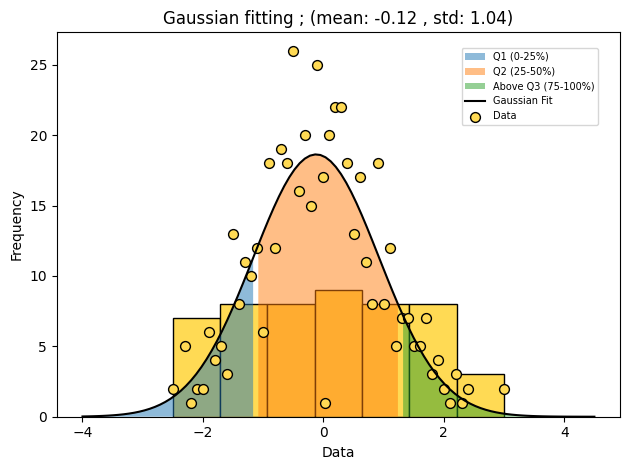

In [61]:
fig1, ax1 = plt.subplots(dpi=100)

'''
ax1.axvline(Q1, color='#14f799', linestyle='dashed', linewidth=1.5, label='Q1 (25th Percentile)')
ax1.axvline(Q2, color='#30ffa9', linestyle='dashed', linewidth=1.5, label='Median (50th Percentile)')
ax1.axvline(Q3, color='#66fabd', linestyle='dashed', linewidth=1.5, label='Q3 (75th Percentile)')
'''

ax1.hist(new_data, bins='auto',linewidth=1,color='#ffda54',edgecolor='black')
ax1.fill_between(x_model, y_model, where=(x_model <= Q1), alpha=0.5, label='Q1 (0-25%)')
ax1.fill_between(x_model, y_model, where=(x_model >= Q1) & (x_model <= Q3), alpha=0.5, label='Q2 (25-50%)')
ax1.fill_between(x_model, y_model, where=(x_model >= Q3), alpha=0.5, label='Above Q3 (75-100%)')
ax1.plot(x_model, y_model, color='black', label='Gaussian Fit')
ax1.scatter(new_data, abundance, label='Data',**filled_style)

ax1.set_title(f'Gaussian fitting ; (mean: {b_opt:.2f} , std: {c_opt:.2f})')
ax1.set_xlabel('Data')
ax1.set_ylabel('Frequency')
fig1.legend(loc='upper right', bbox_to_anchor=(0.95,0.9), prop={'size': 7})
fig1.tight_layout()

## Part 2

<p align=right style="font-family: Estedad" >هریک از مقادیر عددی مجموعه داده های سوال اول را با تبدیل خطی زیر کدگذاری کنید</p>

$$ y = 5 - 3x $$

In [62]:
new_data2 = 5-(new_data*3)

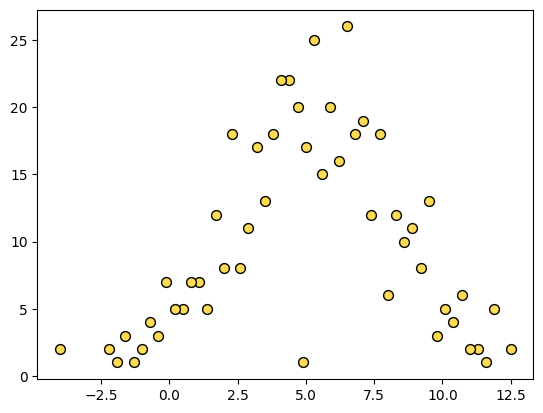

In [63]:
plt.scatter(new_data2,abundance,**filled_style)

<p align=right style="font-family: Estedad"> انتخاب یک طول رده مناسب و رده های متصل </p>

In [64]:
total_bins2 = np.histogram(new_data2, bins='auto')
counts2 = total_bins2[0]
bins2 = total_bins2[1]
intervals2 = [f"[{bins2[i]:.2f}, {bins2[i+1]:.2f}]" for i in range(len(counts2))]

#Method 1
Delta_x2 = bins2[1] - bins2[0]
#Method 2
#L = (bins[-1] - bins[0]) / len(counts)

print('intervals: ', intervals2)
print('counts: ',[int(i) for i in counts2])
print('bins: ',[i for i in bins2])
print(f'bins distance: {Delta_x2:.2f}')
#print(f'L: {L:.2f}')

intervals:  ['[-4.00, -1.64]', '[-1.64, 0.71]', '[0.71, 3.07]', '[3.07, 5.43]', '[5.43, 7.79]', '[7.79, 10.14]', '[10.14, 12.50]']
counts:  [3, 8, 8, 9, 8, 8, 7]
bins:  [-4.0, -1.6428571428571428, 0.7142857142857144, 3.071428571428571, 5.428571428571429, 7.7857142857142865, 10.142857142857142, 12.5]
bins distance: 2.36


<p align=right style="font-family: Estedad"> جدول فراوانی شامل بازه رده، مرکز رده، فراوانی نسبی </p>

<p align=right style="font-family: Estedad">مرکز رده</p>

In [65]:
bin_centers2 = (bins2[:-1] + bins2[1:]) / 2
bin_centers2

array([-2.82142857, -0.46428571,  1.89285714,  4.25      ,  6.60714286,
        8.96428571, 11.32142857])

<p align=right style="font-family: Estedad"> (Cumulative Frequency)(فراوانی نسبی) فراوانی تجمعی </p>

In [66]:
f2 = np.cumsum(counts2) / np.sum(counts2)
print('Cumulative Frequency:', f2)

Cumulative Frequency: [0.05882353 0.21568627 0.37254902 0.54901961 0.70588235 0.8627451
 1.        ]


In [67]:
RCF_Table2 = pd.DataFrame({
    'Intervals': intervals2,
    'Counts': counts2,
    'Cumulative Frequency': np.cumsum(counts2) / np.sum(counts2),
    'Relative Cumulative Frequency':(np.cumsum(counts2) / np.sum(counts2))* 100 
})

Frequency_Table2 = pd.DataFrame({
    'Bin_Centers': bin_centers2,
    'Counts': counts2,
})

RCF_Table2.head() , Frequency_Table2.head()

(        Intervals  Counts  Cumulative Frequency  Relative Cumulative Frequency
 0  [-4.00, -1.64]       3              0.058824                       5.882353
 1   [-1.64, 0.71]       8              0.215686                      21.568627
 2    [0.71, 3.07]       8              0.372549                      37.254902
 3    [3.07, 5.43]       9              0.549020                      54.901961
 4    [5.43, 7.79]       8              0.705882                      70.588235,
    Bin_Centers  Counts
 0    -2.821429       3
 1    -0.464286       8
 2     1.892857       8
 3     4.250000       9
 4     6.607143       8)

<p align=right style="font-family: Estedad">با استفاده از جدول فراوانی، میانگین و انحراف معیار توزیع (داده های گروه بندی شده جدید) محاسبه کنید</p>

<p align=right style="font-family: Estedad"> (Trimmed Mean)میانگین پیراسته </p>

In [68]:
grouped_mean2 = np.sum(Frequency_Table2['Bin_Centers'] * Frequency_Table2['Counts']) / np.sum(Frequency_Table2['Counts'])

<p align=right style="font-family: Estedad"> (Winsorized Mean)میانگین وینزوری </p>

In [69]:
grouped_std2 = np.sqrt(np.sum(Frequency_Table2['Counts'] * (Frequency_Table2['Bin_Centers'] - grouped_mean2)**2) / np.sum(Frequency_Table2['Counts']))

In [70]:
print(f'std: {grouped_std2:.2f}, mean: {grouped_mean2:.2f}')

std: 4.27, mean: 4.80


<p align=right style="font-family: Estedad"> میانگین و انحراف معیاری که بدست آورده با آنچه انتظار داریم سازگار است؟ </p>
<p align=right style="font-family: Estedad"> بله </p>

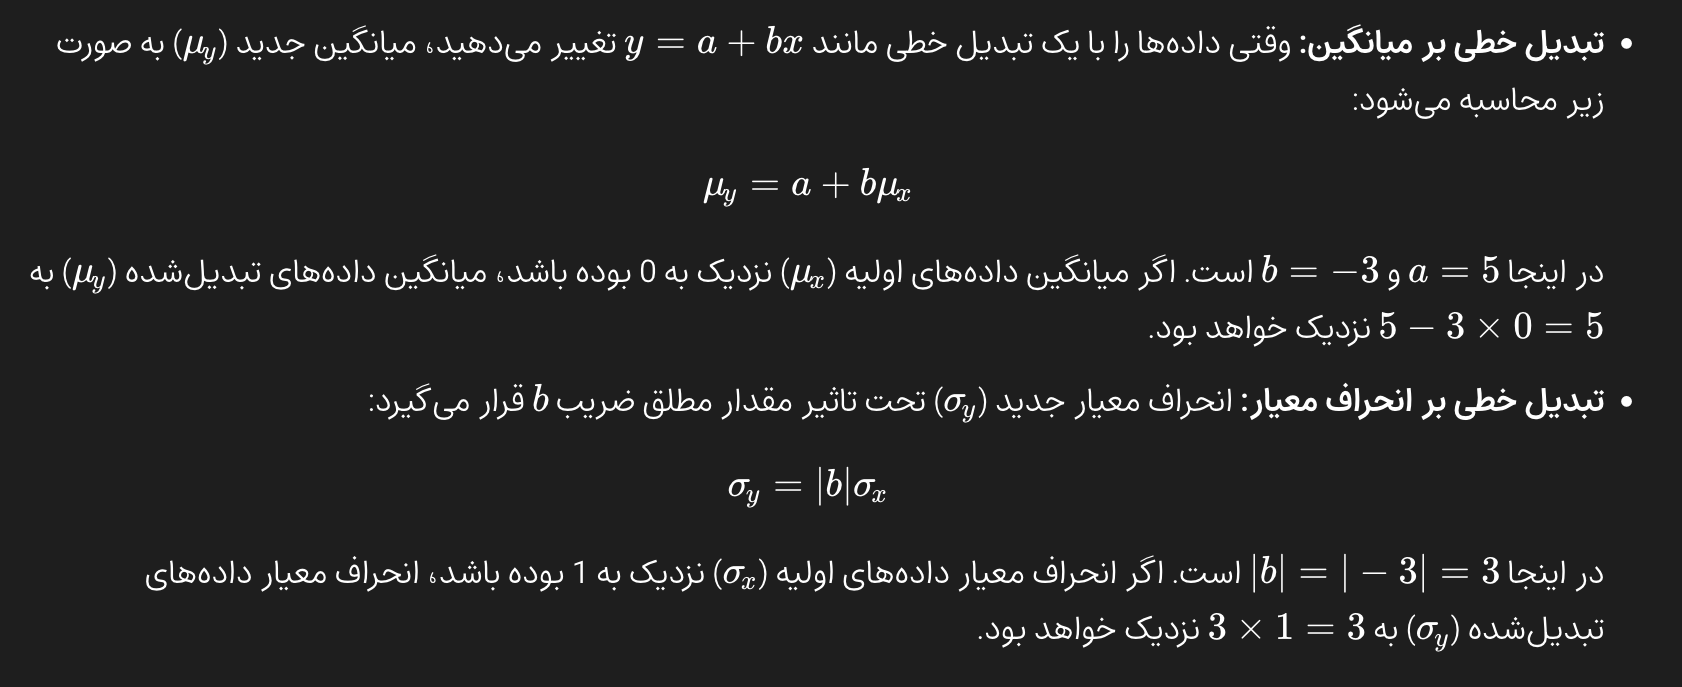

In [71]:
print(f'distance of real mean: {abs(5 - grouped_mean2):.2f}')
print(f'distance of real std: {abs(3 - grouped_std2):.2}')

distance of real mean: 0.20
distance of real std: 1.3


<p align=right style="font-family: Estedad">یک تابع گاوسی بر بافت نگار فراوانی نسبی توزیع برازش دهید و تابع برازشی را بنویسید</p>

In [72]:
popt2, pcov2 = curve_fit(gauss, new_data2, abundance, p0 = [max(abundance), b, c])

a_opt2, b_opt2, c_opt2 = popt2
x_model2 = np.linspace(min(new_data2) - 5, max(new_data2) + 5, 200)
y_model2 = gauss(x_model2, a_opt2, b_opt2, c_opt2)

<p align=right style="font-family: Estedad"> این تابع، میانگین و انحراف معیار را چه قدر برآورد کرده است؟</p>

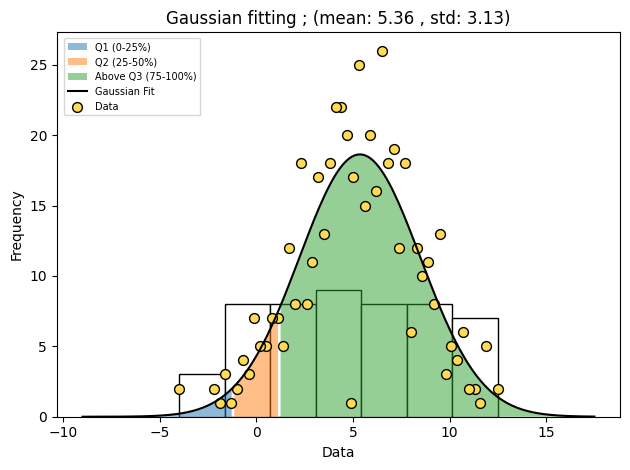

In [73]:
fig2, ax2 = plt.subplots(dpi=100)

'''
Q1 = np.percentile(new_data2, 25)
Q2 = np.percentile(new_data2, 50)
Q3 = np.percentile(new_data2, 75)

ax2.axvline(Q1, color='blue', linestyle='dashed', linewidth=1.5, label='Q1 (25th Percentile)')
ax2.axvline(Q2, color='green', linestyle='dashed', linewidth=1.5, label='Median (50th Percentile)')
ax2.axvline(Q3, color='red', linestyle='dashed', linewidth=1.5, label='Q3 (75th Percentile)')
'''

ax2.hist(new_data2, bins='auto',linewidth=1,color='white',edgecolor='black')
ax2.fill_between(x_model2, y_model2, where=(x_model2 <= Q1), alpha=0.5, label='Q1 (0-25%)')
ax2.fill_between(x_model2, y_model2, where=(x_model2 >= Q1) & (x_model2 <= Q3), alpha=0.5, label='Q2 (25-50%)')
ax2.fill_between(x_model2, y_model2, where=(x_model2 >= Q3), alpha=0.5, label='Above Q3 (75-100%)')
ax2.plot(x_model2, y_model2, color='black', label='Gaussian Fit')
ax2.scatter(new_data2, abundance, label='Data',**filled_style)


ax2.set_title(f'Gaussian fitting ; (mean: {b_opt2:.2f} , std: {c_opt2:.2f})')
ax2.set_xlabel('Data')
ax2.set_ylabel('Frequency')
fig2.legend(loc='upper left', bbox_to_anchor=(0.1,0.92), prop={'size': 7})
fig2.tight_layout()

<p align=right style="font-family: Estedad"> این تابع برازش، میانگین و انحراف معیاری که بدست آورده با آنچه انتظار داریم سازگار است؟ </p>
<p align=right style="font-family: Estedad"> بله مقادیر به آن چیزی که انتظار بسیار نزدیک اند. </p>

In [74]:
print(f'distance of real mean: {abs(5 - b_opt2):.2f}')
print(f'distance of real std: {abs(3 - c_opt2):.2}')

distance of real mean: 0.36
distance of real std: 0.13
